In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV

from sklearn.linear_model import LogisticRegression

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# Unsupervised
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
# Evaluation
from sklearn.metrics import silhouette_score


# Semi-Supervised
from sklearn.semi_supervised import LabelSpreading

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# Pipiline
from sklearn.pipeline import Pipeline

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('./data/mil_expend.csv')
data.shape[0]

264

In [4]:
brics_names = ['Brazil',
               'China',
               'Egypt',
               'Ethiopia',
               'India',
               'Indonesia',
               'Iran',
               'Russian Federation',
               'South Africa',
               'United Arab Emirates']

nato_names = [
    'Albania',
    'Belgium',
    'Bulgaria',
    'Canada',
    'Croatia',
    'Czech Republic',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Italy',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Montenegro',
    'Netherlands',
    'North Macedonia',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Slovak Republic',
    'Slovenia',
    'Spain',
    'Sweden',
    'Turkey',
    'United Kingdom',
    'United States'
]

BRICS = data[data['Name'].isin(brics_names)]
NATO = data[data['Name'].isin(nato_names)]
BRICS['is_nato'] = 0
NATO['is_nato'] = 1
TOTAL = pd.concat(objs=[BRICS, NATO], ignore_index=True)
print(TOTAL.shape[0])
TOTAL.sample(5)

# TOTAL is NATO & BRICS merged together
# NATO is 32 elements
# BRICS is 10 elements

42


C:\Users\bosso\AppData\Local\Temp\ipykernel_18184\4174210904.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRICS['is_nato'] = 0
C:\Users\bosso\AppData\Local\Temp\ipykernel_18184\4174210904.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NATO['is_nato'] = 1


,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,is_nato
2,China,CHN,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.160000e+11,1.380000e+11,1.570000e+11,1.800000e+11,2.010000e+11,2.140000e+11,2.160000e+11,2.280000e+11,2.500000e+11,0
4,Ethiopia,ETH,Country,Military expenditure (current USD),1.533526e+07,1.855527e+07,2.018539e+07,2.728952e+07,36140000.0,42900000.0,...,3.036170e+08,3.324418e+08,3.665390e+08,3.450642e+08,4.144760e+08,4.425515e+08,4.901772e+08,5.031582e+08,4.966211e+08,0
24,Hungary,HUN,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.350820e+09,1.472070e+09,1.322278e+09,1.280051e+09,1.209802e+09,1.132476e+09,1.288676e+09,1.463014e+09,1.642338e+09,1
1,Brazil,BRA,Country,Military expenditure (current USD),3.827298e+08,3.423397e+08,3.874490e+08,4.419996e+08,354227857.1,632869026.5,...,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10,0
39,Sweden,SWE,Country,Military expenditure (current USD),5.268489e+08,5.647364e+08,6.362587e+08,6.979226e+08,758619889.8,844543330.0,...,5.885936e+09,6.324747e+09,6.243672e+09,6.528737e+09,6.555518e+09,5.387123e+09,5.427549e+09,5.526593e+09,5.755368e+09,1


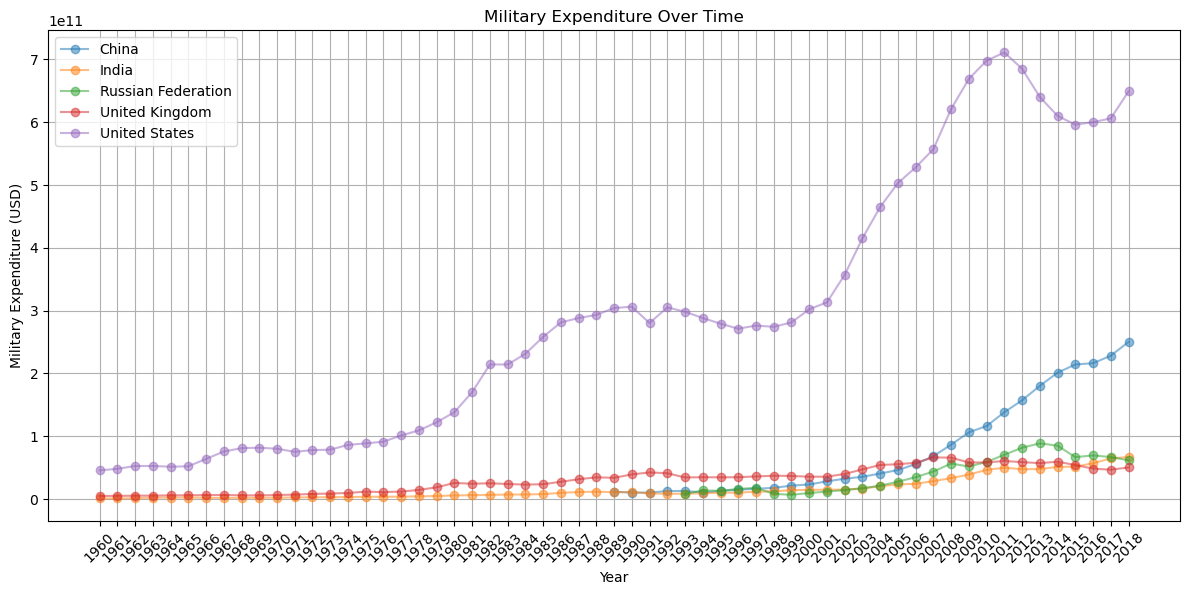

In [7]:
countries_to_plot = [
    "United States",
    "China",
    "Russian Federation",
    "India",
    "United Kingdom"
]
year_columns = list(map(str, range(1960, 2018 + 1)))


plt.figure(figsize=(12, 6))
for _, row in TOTAL.iterrows():
    if row['Name'] in countries_to_plot:
        plt.plot(year_columns, row[year_columns],
                 marker="o", label=row["Name"], alpha=0.5)

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Military Expenditure (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.title("Military Expenditure Over Time")
plt.grid(True)

In [6]:
year_columns = list(map(str, range(1960, 2019)))
future_years = list(range(2019, 2031))
X = np.array(list(map(int, year_columns))).reshape(-1, 1)
X_future = np.array(list(map(int, future_years))).reshape(-1, 1)
predictions = pd.DataFrame({"Name": TOTAL["Name"]})

for index, row in TOTAL.iterrows():
    country_name = row["Name"]
    y = row[year_columns].astype(float).values.reshape(-1, 1)

    if np.isnan(y).all():
        predictions.loc[index, future_years] = np.nan
        continue

    y = np.nan_to_num(y, nan=np.nanmean(y))

    model = LinearRegression()
    model.fit(X, y)
    y_future = model.predict(X_future).flatten()

    predictions.loc[index, future_years] = y_future
    predictions.loc[index, 'is_nato'] = row['is_nato']

predictions

,Name,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,is_nato
0,United Arab Emirates,1.162468e+10,1.165860e+10,1.169253e+10,1.172645e+10,1.176038e+10,1.179431e+10,1.182823e+10,1.186216e+10,1.189608e+10,1.193001e+10,1.196394e+10,1.199786e+10,0.0
1,Brazil,2.663292e+10,2.718541e+10,2.773790e+10,2.829038e+10,2.884287e+10,2.939536e+10,2.994785e+10,3.050034e+10,3.105283e+10,3.160532e+10,3.215781e+10,3.271030e+10,0.0
2,China,1.117704e+11,1.128645e+11,1.139587e+11,1.150528e+11,1.161470e+11,1.172411e+11,1.183353e+11,1.194294e+11,1.205236e+11,1.216177e+11,1.227119e+11,1.238060e+11,0.0
3,Egypt,4.175579e+09,4.231114e+09,4.286650e+09,4.342186e+09,4.397721e+09,4.453257e+09,4.508793e+09,4.564328e+09,4.619864e+09,4.675400e+09,4.730935e+09,4.786471e+09,0.0
4,Ethiopia,5.124514e+08,5.199799e+08,5.275084e+08,5.350369e+08,5.425654e+08,5.500940e+08,5.576225e+08,5.651510e+08,5.726795e+08,5.802080e+08,5.877365e+08,5.952650e+08,0.0
5,Indonesia,4.628162e+09,4.684143e+09,4.740124e+09,4.796105e+09,4.852086e+09,4.908067e+09,4.964048e+09,5.020029e+09,5.076010e+09,5.131991e+09,5.187972e+09,5.243953e+09,0.0
6,India,4.287460e+10,4.377516e+10,4.467573e+10,4.557629e+10,4.647685e+10,4.737742e+10,4.827798e+10,4.917854e+10,5.007911e+10,5.097967e+10,5.188023e+10,5.278080e+10,0.0
7,Iran,1.351419e+10,1.371976e+10,1.392533e+10,1.413089e+10,1.433646e+10,1.454203e+10,1.474760e+10,1.495317e+10,1.515874e+10,1.536431e+10,1.556987e+10,1.577544e+10,0.0
8,Russian Federation,4.749837e+10,4.778059e+10,4.806280e+10,4.834502e+10,4.862723e+10,4.890945e+10,4.919166e+10,4.947388e+10,4.975609e+10,5.003831e+10,5.032052e+10,5.060273e+10,0.0
9,South Africa,4.359109e+09,4.424964e+09,4.490818e+09,4.556672e+09,4.622527e+09,4.688381e+09,4.754236e+09,4.820090e+09,4.885944e+09,4.951799e+09,5.017653e+09,5.083507e+09,0.0
